In [24]:
#패키지 불러오기
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn import metrics
import matplotlib.pyplot as pit
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier

In [25]:
#데이터프레임으로 데이터 읽어오기
df = pd.read_csv("data/titanic.csv", index_col='PassengerId') #인덱스를 PassengerId로 지정
#df = df.set_index('PassengerId') 이거 쓸 수도 있음
print(df.shape)
df.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
#[전처리 시작]
#필요없는 칼럼 제거하기
df = df.drop(['Name', 'Ticket', 'Cabin', 'Embarked'],axis=1)
#axis 는 종으로 제거할지 힝으로 제거할지 옵션을 줌, 1은 수직
#제거 확인
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,male,22.0,1,0,7.2500
2,1,1,female,38.0,1,0,71.2833
3,1,3,female,26.0,0,0,7.9250
4,1,1,female,35.0,1,0,53.1000
5,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,male,27.0,0,0,13.0000
888,1,1,female,19.0,0,0,30.0000
889,0,3,female,NaN,1,2,23.4500


In [27]:
#Sex 칼럼에서 male 을 1로, female 을 0으로 바꾸기
df["Sex"] = df.Sex.map({"male":1,"female":0})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,NaN,1,2,23.4500


In [28]:
#Null 값을 나머지 값의 중간값으로 변경하기 전에 Null값이 몇개인지 확인
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [29]:
#결측치값을 Medium(중간값)으로 변경
#나이가 없는 데이터는 중간값으로 채우자
#df의 Age 칼럼의 Na 값을 Median 으로 바꾸기, Inplace 는 True
df.Age.fillna(df.Age.median(), inplace=True)

In [30]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
887,0,2,1,27.0,0,0,13.0000
888,1,1,0,19.0,0,0,30.0000
889,0,3,0,28.0,1,2,23.4500


In [31]:
#X값을 Pclass ~ Fare 등 변수로 집어넣고
#Y값은 output 변수
X = np.array(df.iloc[:,1:]) #모든 행 집어넣기 및 1~마지막까지 열 집어넣기, 훈련데이터
Y = np.array(df['Survived']) #테스트 데이터

In [32]:
X

array([[ 3.    ,  1.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  0.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 3.    ,  0.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       ...,
       [ 3.    ,  0.    , 28.    ,  1.    ,  2.    , 23.45  ],
       [ 1.    ,  1.    , 26.    ,  0.    ,  0.    , 30.    ],
       [ 3.    ,  1.    , 32.    ,  0.    ,  0.    ,  7.75  ]])

In [33]:
Y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [34]:
#모델 적합
#트레이닝 셋트와 테스트 셋트로 데이터 구분(여기서는 7:3으로 구분)
#이건 답을 알려줬으니 지도학습이구만!
from sklearn.model_selection import train_test_split

#random_state는 반복적으로 같은 결과를 내기 위해서 설정
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
#random_state : 랜덤으로 뽑는 방식 지정

#통으로 된 걸 X,Y 로 나누고 train 과 test 로 나누는 작업
print("X_train 크기:", X_train.shape)
print("y_train 크기:", Y_train.shape)
print("X_test 크기:", X_test.shape)
print("y_test 크기:", Y_test.shape)

X_train 크기: (623, 6)
y_train 크기: (623,)
X_test 크기: (268, 6)
y_test 크기: (268,)


In [35]:
#
from sklearn.tree import DecisionTreeClassifier

#fit 는 적합시킨다는 의미 (학습시킬 때는 train 만 씀)
tree = DecisionTreeClassifier(random_state=0) #max_depth 미지정
tree.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=0)

In [36]:
#4. 모델 성능평가
temp_y_pred = tree.predict(X_test)
#x 테스트를 가지고 예측한 결과가 y 트레인과 얼마나 맞는지 평가
#저장된 값은 실제 진행된 결과값이 저장되는 곳 > temp
# Training 값을 X_test 에서 넣음
print("예측값\n", temp_y_pred)
print("실제값\n", Y_test)

#모델의 성능을 좌우하면

예측값
 [0 0 0 1 1 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 1 0 0
 0 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1
 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0]
실제값
 [0 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0
 0 0 0 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1 0
 1 1 0 1 1 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1

In [37]:
#정확도 계산
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

temp_acc = accuracy_score(Y_test, temp_y_pred)

#y_test 
#temp_pred (예측한 걸 넣어둔 거랑) ytest (실제 결과) 사이의 정확도를 계산함

print('정확도: ', format(temp_acc))

정확도:  0.8022388059701493


In [38]:
#오차행렬(COnfusion Matrix) //살았는데 죽었다고 한 경우나 죽었는데 살았다고 한 경우
print(confusion_matrix(Y_test, temp_y_pred))

[[147  21]
 [ 32  68]]


In [39]:
from sklearn.metrics import precision_score, recall_score, f1_score

print('정확도: ', accuracy_score(Y_test, temp_y_pred))

정확도:  0.8022388059701493


In [40]:
#분류를 잘 하는지 테스트해보자
tree.predict([[1, 0, 20, 2, 2, 10]]) #list 안의 list
#객실등급, 성별(1/0), 나이, 형제자매와 배우자수, 부모자녀수, 운임 입력

array([1], dtype=int64)

# 과적합과 가지치기

#### 훈련데이터 정확도값과 테스트데이터 정확도값을 담는 리스트 생성

In [41]:
train_scores, test_scores = list(), list()

#### max_depth 값이 1일 때부터 20일 때까지 반복적으로 모델 피팅후
#### 정확도값을 리스트에 추가

#### 여기서는 max_depth의 값 변화에 따른
#### 훈련데이터의 정확도와 테스트데이터의 정확도의 변화를 확인할 예정 

In [42]:
for i in range(1,20):
    DT1 = DecisionTreeClassifier(max_depth=i)
    DT1.fit(X_train, Y_train)
    
    #정확도 평가
    train_att = DT1.predict(X_train)
    train_acc = accuracy_score(Y_train, train_att)
    train_scores.append(train_acc) #train_acc를 train_scores 에 추가
    
    # 테스트 데이터셋 정확도 평가
    test_att = DT1.predict(X_test)
    test_acc = accuracy_score(Y_test, test_att)
    test_scores.append(test_acc)
    
    #depth 개수에 따른 정확도 차이 확인
    print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    

>1, train: 0.787, test: 0.787
>2, train: 0.791, test: 0.787
>3, train: 0.836, test: 0.821
>4, train: 0.844, test: 0.821
>5, train: 0.859, test: 0.813
>6, train: 0.872, test: 0.795
>7, train: 0.881, test: 0.802
>8, train: 0.905, test: 0.813
>9, train: 0.926, test: 0.813
>10, train: 0.939, test: 0.799
>11, train: 0.955, test: 0.802
>12, train: 0.968, test: 0.817
>13, train: 0.971, test: 0.799
>14, train: 0.976, test: 0.821
>15, train: 0.978, test: 0.802
>16, train: 0.978, test: 0.802
>17, train: 0.979, test: 0.787
>18, train: 0.979, test: 0.799
>19, train: 0.979, test: 0.802


### pyplot 라이브러리 호출

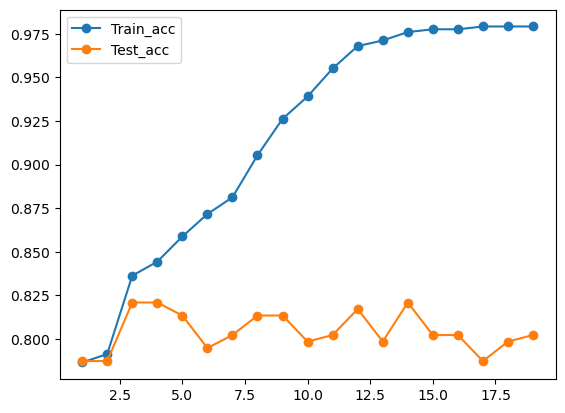

In [43]:
#pyplot 라이브러리 호출
from matplotlib import pyplot

pyplot.plot(range(1,20), train_scores, '-o', label='Train_acc')
pyplot.plot(range(1,20), test_scores, '-o', label='Test_acc')
#pyplot 의 legend 

pyplot.legend()
pyplot.show()
#훈련데이터의 정확성과 테스트데이터의 정확성의 차이 격차가 크게
#벌어지기 시작하는 구간인 3이 가장 적절함

#교재와 xy가 뒤집혀 있음 참조!

In [44]:
#최적 나무깊이(test 값의 정확도가 떨어지지 않는 선에서 가장 테스트 데이터의 정확도가 높은 거)

In [59]:
tree = DecisionTreeClassifier(random_state=0, max_depth=4)
#max_depth 3으로 지정
tree.fit(X_train, Y_train)
print('정확도: ', accuracy_score(Y_test,  tree.predict(X_test)))

정확도:  0.8208955223880597


# 시각화

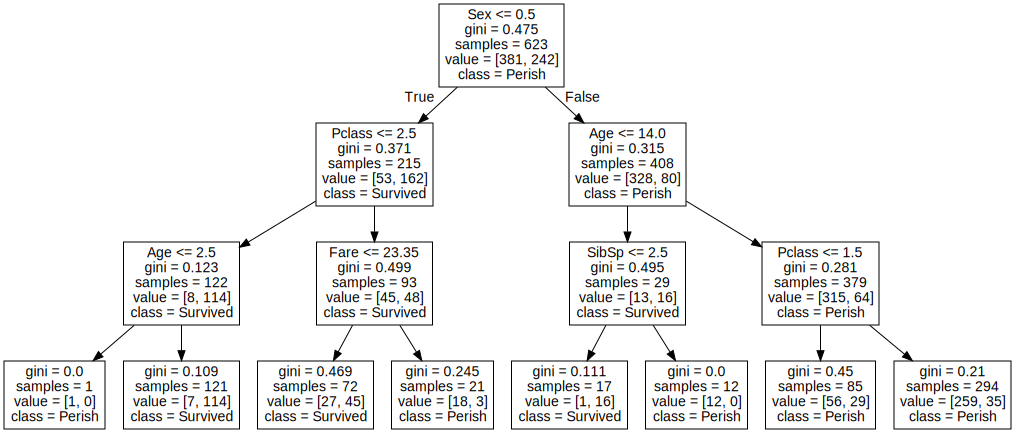

In [46]:
import graphviz
from sklearn.tree import export_graphviz

feature_name=['Pclass','Sex','Age','SibSp','Parch','Fare']
tree_graph = export_graphviz(tree, feature_names=feature_name,
                             class_names=['Perish','Survived'])
graphviz.Source(tree_graph)

In [47]:
#만약 module 을 찾을 수 없는 경우 
import sys
print(sys.executable)

C:\ProgramData\Anaconda3\python.exe


In [48]:
dot = graphviz.Source(tree_graph)
dot.format = 'gif'
dot.render(filename='titanic_tree', directory='tree', cleanup=True)

'tree\\titanic_tree.gif'